# Cross Validation dan Feature Engineering

Cross Validation adalah teknik untuk mengetes beberapa kali saat menilai akurasi model machine learning kita

Feature Engineering adalah gabungan teknik untuk mengubah "fitur" sehingga model yang kita latih menjadi lebih akurat


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold, cross_val_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

from scipy.stats import boxcox

from sklearn.feature_selection import SelectKBest, f_classif, RFE

from sklearn.decomposition import PCA

In [54]:
# pull data, misalnya kita gunakan dataset contoh iris dan diabetes dari sklearn
from sklearn.datasets import load_iris, load_diabetes

In [7]:
iris = load_iris()
X = iris.data
y = iris.target

df_iris = pd.DataFrame(X)
df_iris.columns = iris.feature_names
df_iris['target'] = y
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
# membuat model
model_iris = LogisticRegression(max_iter=200)

model_iris.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [13]:
# k-fold
kf_iris = KFold(n_splits=5, shuffle=True, random_state=8)
scores = cross_val_score(model_iris, X, y, cv=kf_iris, scoring="accuracy")

print("Scores:", scores)
print("Mean score:", scores.mean())

Scores: [0.9        0.96666667 1.         1.         0.96666667]
Mean score: 0.9666666666666666


Teknik cross validation lainnya seperti:

- stratified kfold, selain kfold dia juga pastikan jumlah kategori per fold itu ratio nya sama
- leave one out, kalau ada 10 data maka dia split 10 kali
- repeated kfold, setelah kfold kita ulang lagi dengan cara split yang berbeda


## Feature Engineering

- Creation
- Transformation
- Selection
- Extraction

### Feature Creation

membuat fitur baru dari data yang ada

- datetime: membuat kolom year/ month/ day/ weekday dari satu kolom tipe datetime
- text: buat kolom "word count", "average word length" atau "contain keyword" dari kolom "product reviews"
- numerik: buat kolom "luas" dari kolom "panjang" dan "lebar"


In [ ]:
# ambil sample data
df_stress = pd.read_csv("dataset/academicStress.csv")

df_stress['Timestamp'] = pd.to_datetime(df_stress['Timestamp'])
df_stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   Timestamp                                                            121 non-null    datetime64[ns]
 1   Your Academic Stage                                                  121 non-null    object        
 2   Peer pressure                                                        121 non-null    int64         
 3   Academic pressure from your home                                     121 non-null    int64         
 4   Study Environment                                                    121 non-null    object        
 5   What coping strategy you use as a student?                           121 non-null    object        
 6   Do you have any bad habits like smoking, drinking o

C:\Users\user\AppData\Local\Temp\ipykernel_11440\1959934012.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_stress['Timestamp'] = pd.to_datetime(df_stress['Timestamp'])


In [18]:
# buat kolom baru year month day weekday
df_stress['year'] = df_stress['Timestamp'].dt.year
df_stress['month'] = df_stress['Timestamp'].dt.month
df_stress['day'] = df_stress['Timestamp'].dt.day
df_stress['weekday'] = df_stress['Timestamp'].dt.weekday

# buat kolom baru untuk rata2 pressure
df_stress['average pressure'] = np.round(
    (df_stress['Peer pressure'] + df_stress['Academic pressure from your home'])/2)
df_stress.head()

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index,year,month,day,weekday,average pressure
0,2025-07-24 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5,2025,7,24,3,4.0
1,2025-07-24 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3,2025,7,24,3,4.0
2,2025-07-24 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4,2025,7,24,3,1.0
3,2025-07-24 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3,2025,7,24,3,2.0
4,2025-07-24 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5,2025,7,24,3,3.0


### Feature Transformation

mengubah fitur untuk meningkatkan performa model

- scale
- distribution
- perubahan bentuk lainnya


In [20]:
# contoh data
X = np.array([[1], [10], [100]])
print(X)

[[  1]
 [ 10]
 [100]]


In [21]:
# standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[-0.80538727]
 [-0.60404045]
 [ 1.40942772]]


In [ ]:
# log transform
X_log = np.log1p(X)  # log(1+x)
print(X_log)

[[0.69314718]
 [2.39789527]
 [4.61512052]]


scaling mengubah data kita jadi memiliki skala yang sama. contoh diatas dari 1 10 dan 100, scaling mengubah jadi dekat (standard scaler), log scaling diubah menggunakan logaritma


In [23]:
# tarik sample data dan lihat distribusi nya
df_sleep = pd.read_csv("dataset/sleep_dat.csv")
df_sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


[27. 31. 35. 39. 43. 47. 51. 55. 59.] [32 50 64 40 78 34 41 35]


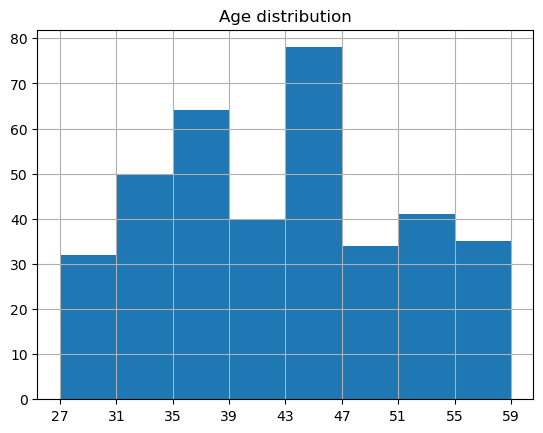

In [30]:
# gunakan jumlah bins yang sama
b = 8

count, bin_edges = np.histogram(df_sleep['Age'], bins=b)
print(bin_edges, count)

df_sleep['Age'].hist(bins=b)

plt.xticks(bin_edges)
plt.title("Age distribution")
plt.show()

ada beberapa jenis normalization yang tujuan utama untuk membuat distribusi lebih normal:

- square root transform (kalau datanya skewed)
- box cox transform (general mengubah distribusi jadi normal)
- standardscaler atau minmaxscaler bawaan dari sklearn juga termasuk mengubah distribusi data jadi lebih normal


[5.19615242 5.50677659 5.81740075 6.12802492 6.43864909 6.74927325
 7.05989742 7.37052158 7.68114575] [32 48 46 51 87 14 61 35]


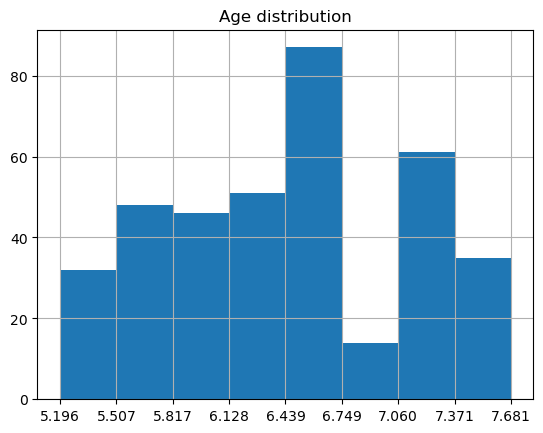

In [ ]:
# square root transform
data = np.sqrt(df_sleep['Age'])

b = 8

count, bin_edges = np.histogram(data, bins=b)
print(bin_edges, count)

data.hist(bins=b)

plt.xticks(bin_edges)
plt.title("Age distribution")
plt.show()

untuk data kita yang tidak skewed, square root transform malah membuat dia jadi makin tidak normal


[4.26160586 4.43144475 4.60128364 4.77112253 4.94096142 5.11080031
 5.2806392  5.45047809 5.62031698] [19 61 26 59 85 17 65 42]


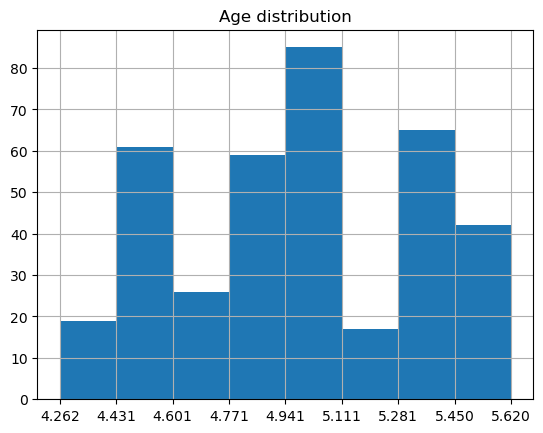

In [36]:
# box cox transform
data, lam = boxcox(df_sleep['Age'])
data = pd.DataFrame(data)

b = 8

count, bin_edges = np.histogram(data, bins=b)
print(bin_edges, count)

data.hist(bins=b)

plt.xticks(bin_edges)
plt.title("Age distribution")
plt.show()

sekali lagi karena data awal kita sudah mendekati distribusi normal, teknik ini malah membuat dia jadi menjauh dari distribusi normal


referensi bacaan tambahan:

- square root transformation https://quantifyinghealth.com/square-root-transformation/
- box cox transformation https://www.geeksforgeeks.org/python/box-cox-transformation-using-python/
- standard scaling https://www.kaggle.com/code/alexisbcook/scaling-and-normalization


### Feature Selection

- filter method: gunakan korelasi atau test statistic lainnya untuk menghapus fitur2 yg tidak ada hubungan dengan target
- wrapper method: recursive feature elimination - dari model yang sudah jadi kita cek fitur mana yang paling ber efek
- embedded method: termasuk dalam pelatihan model ML nya, misalnya di model tipe RandomForest ada "feature importance"


In [52]:
# misal kita gunakan data iris tadi
X, y = load_iris(return_X_y=True)
print(pd.DataFrame(X))

# filter method
# pilih fitur terbaik, pakai filter method
selector_iris = SelectKBest(score_func=f_classif, k=2)
X_new = selector_iris.fit_transform(X, y)

print(pd.DataFrame(X_new))

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]
       0    1
0    1.4  0.2
1    1.4  0.2
2    1.3  0.2
3    1.5  0.2
4    1.4  0.2
..   ...  ...
145  5.2  2.3
146  5.0  1.9
147  5.2  2.0
148  5.4  2.3
149  5.1  1.8

[150 rows x 2 columns]


dengan teknik filter method dari SelectKBest kita bisa pilih k fitur terbaik. lalu kita include juga cara pilih terbaik menggunakan apa dari f_classif atau yang lainnya

### wrapper method

mencari fitur terbaik dengan cara melatih model berkali kali menggunakan kombinasi fitur yang berbeda

- mahal
- biasanya lebih bagus
- contohnya Recursive Feature Elimination


In [50]:
# wrapper method
# Recursive Feature Elimination

# load lagi datanya
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

# Model
model_iris = LogisticRegression(max_iter=200)

# RFE
selector_iris = RFE(model_iris, n_features_to_select=2)
selector_iris.fit(X, y)

# lihat hasilnya
print(selector_iris.support_)

[False False  True  True]


### Embedded method

fitur selection yang terjadi saat model dilatih

- lebih cepat dari wrapper method
- contoh: Lasso Regression
- contoh lagi: Random Forest "feature importance"

Lasso Regression bisa mengecilkan coefficient fitur ke angka 0, jadi yang coefficient nya 0 dihapus oleh model tersebut


In [55]:
# kita ambil contoh data regression misalnya dataset diabetes dari sklearn
X, y = load_diabetes(return_X_y=True)
feature_names = load_diabetes().feature_names

# gunakan model Lasso Regression
model_lasso = LassoCV(cv=5, random_state=8)
model_lasso.fit(X, y)

# cek coefficient kolom2nya (fitur2nya)
coef = pd.Series(model_lasso.coef_, index=feature_names)
print(coef)

age     -6.494693
sex   -235.993080
bmi    521.744369
bp     321.060777
s1    -569.438134
s2     302.453193
s3      -0.000000
s4     143.698515
s5     669.922675
s6      66.835511
dtype: float64


In [57]:
# fitur terpilih
print("Selected features")
print(coef[coef != 0])

Selected features
age     -6.494693
sex   -235.993080
bmi    521.744369
bp     321.060777
s1    -569.438134
s2     302.453193
s4     143.698515
s5     669.922675
s6      66.835511
dtype: float64


In [59]:
# Random Forest
model_rf = RandomForestClassifier(random_state=8)
model_rf.fit(X, y)

# setelah model ini dilatih kita bisa minta "feature importances"
model_rf.feature_importances_

array([0.11168541, 0.02450703, 0.11831909, 0.11262526, 0.11635785,
       0.11392573, 0.10618702, 0.06030821, 0.12099864, 0.11508575])

In [62]:
importances = pd.Series(model_rf.feature_importances_,
                        index=feature_names).sort_values(ascending=False)
importances

s5     0.120999
bmi    0.118319
s1     0.116358
s6     0.115086
s2     0.113926
bp     0.112625
age    0.111685
s3     0.106187
s4     0.060308
sex    0.024507
dtype: float64

menurut model Random Forest, dari data diabetes tadi, fitur yang paling penting, adalah s5, kemudian bmi.

disini dianggap kalau fitur "sex" paling tidak penting padahal di Lasso Regression tadi yang dihapus adalah fitur "s3"


### Feature Extraction

membuat fitur bari dari fitur yang ada - tapi sedikit lebih rumit dari Feature Creation, dan ada elemen Feature Transformation

umumnya, digunakan untuk:

- mengurangi dimensi data
- mendapatkan pattern dari data (yang penting)
- mengurangi noise (dan redundancy)

kenapa berbeda dengan Feature Selection

- feature selection memilih fitur2 terbaik
- feature extraction membuat fitur dari gabungan fitur awal (creation + transformation)

teknik umum:

1. PCA Principal Component Analysis
2. Linear Discriminant Analysis
3. t-SNE (saat data nonlinear)
4. Text Embedding
5. Autoencoder (deep learning)


In [88]:
# PCA
# 1. load dataset diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

print(X.shape)
df_diabetes = pd.DataFrame(X)
df_diabetes.columns = feature_names
display(df_diabetes.head())

(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [73]:
# 2. standardize dengan standardscaler - penting untuk PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
# 3. Buat model PCA
model_pca = PCA()
X_pca = model_pca.fit_transform(X_scaled)

df_diabetes_pca = pd.DataFrame(X_pca)
df_diabetes_pca.columns = ["PCA 1", "PCA 2", "PCA 3", "PCA 4",
                           "PCA 5", "PCA 6", "PCA 7", "PCA 8", "PCA 9", "PCA 10"]
df_diabetes_pca.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10
0,0.587199,-1.946832,0.589205,0.082816,0.256680,-1.011210,-0.179844,-0.757431,-0.181075,-0.048953
1,-2.831625,1.372082,0.027930,0.470008,0.143269,-1.013015,0.224398,0.188436,0.505128,0.043599
2,0.272129,-1.634901,0.739244,0.791492,1.163870,-1.112763,-0.462452,-0.843203,-0.025353,-0.054175
3,0.049281,0.382278,-2.013032,-1.373216,-0.255570,0.445288,0.482102,0.367871,-0.137857,-0.074558
4,-0.756421,0.811960,-0.057238,0.137495,0.133402,-0.814559,0.436536,1.059751,0.044284,-0.010914


In [76]:
model_pca.explained_variance_ratio_

array([0.40242108, 0.14923197, 0.12059663, 0.09554764, 0.06621814,
       0.06027171, 0.05365657, 0.0433682 , 0.007832  , 0.00085607])

In [78]:
0.40242108 + 0.14923197 + 0.12059663

0.67224968

variance ratio ini menjelaskan seberapa banyak variance datanya yang tersimpan di setiap component PCA


In [83]:
# untuk melihat component terbuat dari apa (gabungan fitur2 awal kita)
pd.DataFrame(model_pca.components_.T,
             index=feature_names,
             columns=["PCA 1", "PCA 2", "PCA 3", "PCA 4",
                      "PCA 5", "PCA 6", "PCA 7", "PCA 8", "PCA 9", "PCA 10"])

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10
age,0.216431,0.044367,0.494668,0.414012,0.686876,-0.225815,-0.109530,-0.014937,0.008100,0.003263
sex,0.186967,-0.386547,-0.106864,0.679860,-0.373464,0.041705,-0.067622,-0.442933,-0.002106,0.003660
bmi,0.303162,-0.156281,0.167527,-0.499825,-0.129333,-0.403151,-0.519874,-0.392922,0.042377,0.008247
bp,0.271738,-0.138266,0.513571,0.019662,-0.486874,-0.272783,0.320655,0.477360,0.027194,-0.003222
s1,0.343255,0.573027,-0.068579,0.068396,-0.129180,0.005398,0.073644,-0.129411,-0.042038,0.709775
s2,0.351861,0.455942,-0.269689,0.167774,-0.116722,-0.133262,-0.230535,0.191325,-0.359316,-0.563195
s3,-0.282437,0.506239,0.386032,0.076020,-0.245001,0.106354,-0.007548,-0.324635,0.481247,-0.317445
s4,0.428834,-0.068181,-0.380680,-0.007921,0.143646,-0.033936,0.071244,0.180587,0.773817,-0.090596
s5,0.378618,-0.026187,0.063630,-0.264427,0.151639,0.178731,0.647302,-0.449684,-0.189460,-0.264466
s6,0.322183,-0.084949,0.276842,-0.087085,-0.031423,0.805066,-0.357267,0.166608,-0.015274,0.002611


setiap component PCA terbuat dari gabungan fitur awal kita


In [86]:
df_diabetes_pca['target'] = y
df_diabetes_pca.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,target
0,0.587199,-1.946832,0.589205,0.082816,0.256680,-1.011210,-0.179844,-0.757431,-0.181075,-0.048953,151.0
1,-2.831625,1.372082,0.027930,0.470008,0.143269,-1.013015,0.224398,0.188436,0.505128,0.043599,75.0
2,0.272129,-1.634901,0.739244,0.791492,1.163870,-1.112763,-0.462452,-0.843203,-0.025353,-0.054175,141.0
3,0.049281,0.382278,-2.013032,-1.373216,-0.255570,0.445288,0.482102,0.367871,-0.137857,-0.074558,206.0
4,-0.756421,0.811960,-0.057238,0.137495,0.133402,-0.814559,0.436536,1.059751,0.044284,-0.010914,135.0


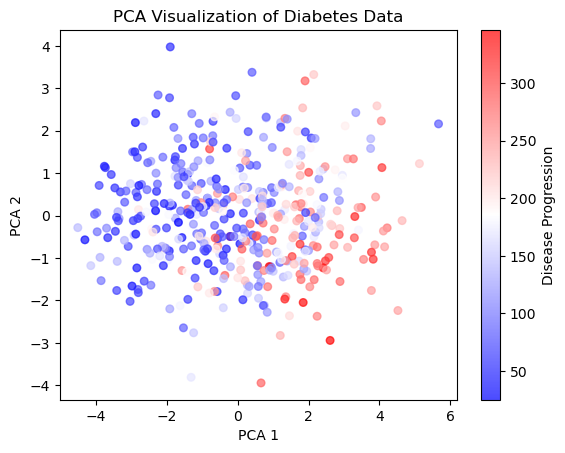

In [99]:
# optional - kita bisa ambil 2 PCA pertama untuk membuat visualisasi data
scatter = plt.scatter(df_diabetes_pca['PCA 1'],
                      df_diabetes_pca['PCA 2'],
                      c=df_diabetes_pca['target'],
                      cmap="bwr",
                      s=30,
                      alpha=0.7
                      )
plt.colorbar(scatter, label="Disease Progression")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Visualization of Diabetes Data")
plt.show()

# Feature Transformation: Scaling

Scaling kita gunakan untuk meng-adjust range/distribution fitur numerik supaya fitur2 numerik kita berada di skala yang sama

Ada banyak model ML yang sensitif ke fitur2 dengan skala yang berbeda (Linear Regression, Logistic Regression, KMeans Clustering, PCA, ...) jadi penggunakan scaling sangat berguna untuk memastikan akurasi model2 seperti ini.

Ada juga model ML yang tidak peduli dengan skala berbeda antar fitur (Decision Tree, Random Forest, Lasso Regression, ...) dan ini tidak perlu kita scaling data

Contoh teknik umum untuk data scaling:

- StandardScaler: mengubah datanya tergantung mean dan std, dia membuat datanya menjadi mean=0 std=1, umumnya untuk data tipe normal distribution


In [102]:
# contoh StandardScaler dengan sample data
df_data = pd.DataFrame({
    "height": [150, 160, 170, 180, 190],
    "weight": [50, 60, 70, 80, 90]
})

display(df_data)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_data)

df_scaled = pd.DataFrame(df_scaled, columns=df_data.columns)

display(df_scaled)

,height,weight
0,150,50
1,160,60
2,170,70
3,180,80
4,190,90


,height,weight
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


In [104]:
# contoh MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_data)

df_scaled = pd.DataFrame(df_scaled, columns=df_data.columns)
display(df_scaled)

,height,weight
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


In [108]:
# contoh Robust Scaling
# menggunakan median dan IQR, berguna kalau data nya punya outlier
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_data)

df_scaled = pd.DataFrame(df_scaled, columns=df_data.columns)
display(df_scaled)

,height,weight
0,-1.0,-1.0
1,-0.5,-0.5
2,0.0,0.0
3,0.5,0.5
4,1.0,1.0


### Encoding

Konversi data kategorikal variable (text) menjadi veri numerik (tetap kategorikal tapi jadi angka), supaya model ML bisa digunakan

termasuk Feature Transformation

Contoh teknik umum encoding:

- Label Encoding
- One-Hot Encoding
- Ordinal Encoding


In [110]:
# coba dengan sample data
df_data = pd.DataFrame({'color': ['red', 'blue', 'green', 'blue']})
display(df_data)

,color
0,red
1,blue
2,green
3,blue


In [111]:
# Label Encoding
encoder = LabelEncoder()
df_data['color_encoded'] = encoder.fit_transform(df_data['color'])

display(df_data)

,color,color_encoded
0,red,2
1,blue,0
2,green,1
3,blue,0


In [123]:
# One Hot Encoding
# membuat kolom baru untuk setiap label kategori

encoder = OneHotEncoder(sparse_output=False)
df_color_encoded = encoder.fit_transform(df_data[['color']])

df_color_encoded = pd.DataFrame(
    df_color_encoded, columns=encoder.get_feature_names_out(['color']))

df_color_encoded

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0


One hot encoding memastikan kalau setiap kategori memiliki "weight" yang sama, karena banyak algoritma ML yang memberi lebih banyak value kalau angka lebih tinggi. Jadi misalkan kita punya 5 kategori, yang diberi angka 4 tidak sengaja dianggap lebih penting. yang dikasih angka 0 dianggap kurang penting. padahal harusnya sama. OHE menyelesaikan masalah ini dengan memberi setiap kategori masing-masing kolom tersendiri.


In [131]:
# Ordinal Encoding

# coba dengan sample data
df_data = pd.DataFrame({'academic_stage':
                        ['tk', 'sd', 'smp', 'sma', 's1',
                            'sd', 'smp', 'tk', 's2', 's3'],
                        'size':
                        ['s', 'm', 'l', 's', 'm', 'l', 's', 'm', 'l', 'm']
                        })
display(df_data)

,academic_stage,size
0,tk,s
1,sd,m
2,smp,l
3,sma,s
4,s1,m
5,sd,l
6,smp,s
7,tk,m
8,s2,l
9,s3,m


In [ ]:
# encoding dua kolom sekaligus
encoder = OrdinalEncoder(
    categories=[['tk', 'sd', 'smp', 'sma', 's1', 's2', 's3'],
                ['s', 'm', 'l']])

df_encoded = encoder.fit_transform(df_data[['academic_stage', 'size']])

df_encoded = pd.DataFrame(
    df_encoded, columns=['encoded academic stage', 'encoded size'])


pd.concat([df_data, df_encoded], axis=1)

,academic_stage,size,encoded academic stage,encoded size
0,tk,s,0.0,0.0
1,sd,m,1.0,1.0
2,smp,l,2.0,2.0
3,sma,s,3.0,0.0
4,s1,m,4.0,1.0
5,sd,l,1.0,2.0
6,smp,s,2.0,0.0
7,tk,m,0.0,1.0
8,s2,l,5.0,2.0
9,s3,m,6.0,1.0


# Latihan

cobalah dengan dataset insurance, lakukan step by step:

- EDA (explorasi data, pakai describe, cari min max mean std, plot boxplot/histogram)
- Feature Engineering
  - scaling
  - encoding
  - feature selection
- Model machine learning
  - Linear Regression
- Evaluasi model
- Extra:
  - save model menggunakan joblib
  - di file lain kita bisa load model pakai joblib
- Gunakan model untuk membuat Prediksi


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold, cross_val_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

from scipy.stats import boxcox

from sklearn.feature_selection import SelectKBest, f_classif, RFE

from sklearn.decomposition import PCA
df = pd.read_csv("dataset/insurance.csv")
df. describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [15]:
import seaborn as sns

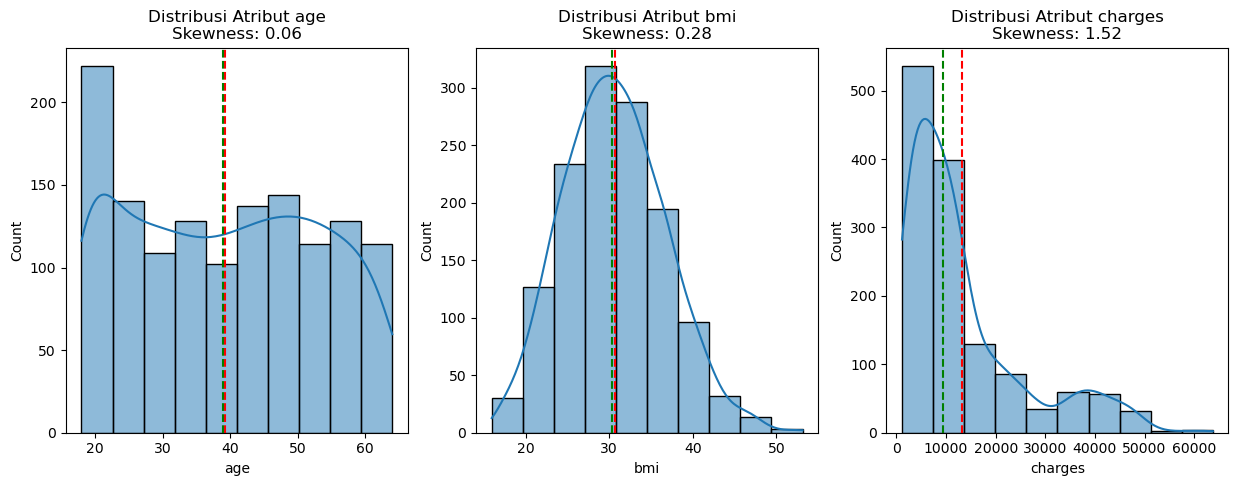

In [16]:
list_numeric= ['age', 'bmi', 'charges']

fig,ax= plt.subplots(1,3, figsize=(15,5))

for i,col in enumerate(list_numeric):
    sns.histplot(data=df, x=col, ax=ax[i], kde=True, bins=10)
    ax[i].axvline(df[col].mean(), color='r', linestyle='--')
    ax[i].axvline(df[col].median(), color='g', linestyle='--')
    ax[i].set_title(f'Distribusi Atribut {col}\nSkewness: {df[col].skew():.2f}')

In [17]:
df['sex'].value_counts(normalize=True)

sex
male      0.505232
female    0.494768
Name: proportion, dtype: float64

In [18]:
# cek korelasi antara charges dan age
df[['age','charges']].corr()['charges']

age        0.299008
charges    1.000000
Name: charges, dtype: float64

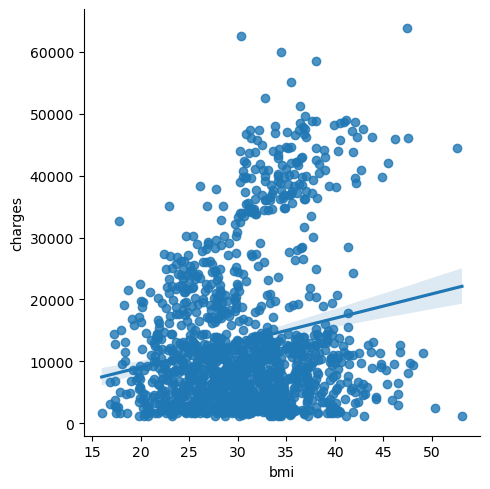

In [19]:
sns.lmplot(data=df, x='bmi', y='charges');#analisis bivaraite

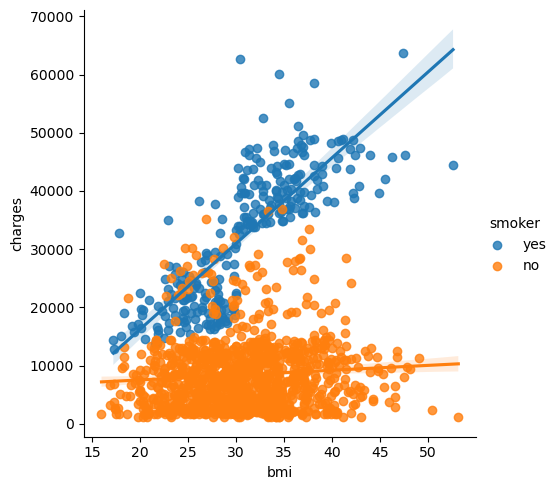

In [20]:
sns.lmplot(data=df, x='bmi', y='charges', hue='smoker'); #analisis multivariate

In [21]:
df[['bmi','charges']].corr() #analisis bivariate (membadinkan atua melihat dua variabel)

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


In [22]:
#analisis multivariate (membadinkan atua melihat lebih dari dua variabel)
df_smoker_yes= df.query('smoker=="yes"')
df_smoker_yes[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.806481
charges,0.806481,1.000000


In [23]:
df_smoker_no= df.query('smoker=="no"')
df_smoker_no[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.084037
charges,0.084037,1.000000


In [24]:
X= df.drop('charges', axis=1) # menggunakan semua fitur
y= df['charges']

In [27]:
# Encoding data nominal
# OneHotEncoder
encoder= OneHotEncoder()
encoder.fit(X_train[['sex', 'region']])
X_train_encoded= encoder.transform(X_train[['sex', 'region']])
X_test_encoded= encoder.transform(X_test[['sex', 'region']])

NameError: name 'X_train' is not defined